In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import mglearn
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'second feature')

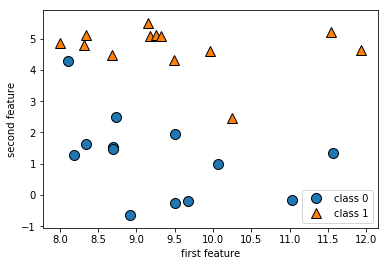

In [12]:
x,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(x[:,0], x[:,1], y);
plt.legend(['class 0','class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
cancer.data.shape

(569, 30)

In [21]:
cancer.target_names #cancer.target

array(['malignant', 'benign'], dtype='<U9')

In [27]:
{n :v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [30]:
#cancer.feature_names

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


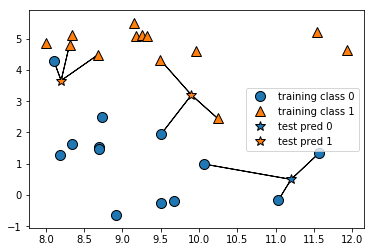

In [35]:
mglearn.plots.plot_knn_classification(n_neighbors=3);

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
x,y = mglearn.datasets.make_forge()
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [43]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [46]:
clf.predict(x_test), y_test

(array([1, 0, 1, 0, 1, 0, 0]), array([1, 0, 1, 0, 1, 1, 0]))

In [48]:
clf.score(x_test, y_test)

0.8571428571428571

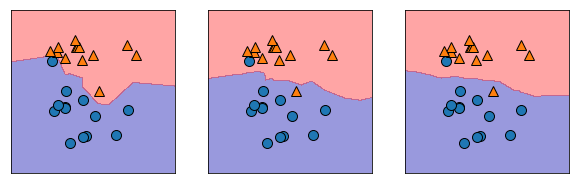

In [55]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors , ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True,ax=ax, alpha=.4 )
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)

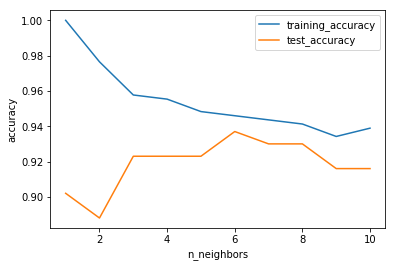

In [58]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training_accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()